<a href="https://colab.research.google.com/github/Indian-otaku/Introduction_To_PyTorch/blob/main/LinearRegressionInPyTorch0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                   requires_grad=True,
                                   dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                requires_grad=True,
                                dtype=torch.float))
    
    def forward(self, X):
        return self.weights * X + self.bias


In [ ]:
torch.manual_seed(48)

X = torch.arange(1,51,1,dtype=torch.float).unsqueeze(dim=1) + torch.randint(low=-40, high=40, size=(50,1),dtype=torch.float)
y = 4 * X + 2 + torch.randn(size=(50,1))

X_train, y_train = X[:40], y[:40]
X_test, y_test = X[40:], y[40:]

X_test

tensor([[32.],
        [44.],
        [15.],
        [69.],
        [26.],
        [44.],
        [22.],
        [40.],
        [30.],
        [86.]])

In [ ]:
model = LinearRegression()

In [ ]:
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)
epochs = 1100

for epoch in range(epochs):
    # Training part
    model.train()
    y_pred_train = model(X_train)
    loss_train = loss_function(y_pred_train, y_train)
    model.zero_grad()
    loss_train.backward()
    optimizer.step()

    if (epoch%100 == 0):
        # Validation part
        model.eval()
        with torch.inference_mode():
            y_pred_test = model(X_test)
            loss_test = loss_function(y_pred_test, y_test)
        
        print(f"Epoch: {epoch} | Train loss: {loss_train} | Test loss: {loss_test} | Parameters: {model.state_dict()}")




Epoch: 0 | Train loss: 69.98072814941406 | Test loss: 93.16213989257812 | Parameters: OrderedDict([('weights', tensor([1.7122])), ('bias', tensor([2.0026]))])
Epoch: 100 | Train loss: 3.408167600631714 | Test loss: 6.33937931060791 | Parameters: OrderedDict([('weights', tensor([3.8407])), ('bias', tensor([1.9826]))])
Epoch: 200 | Train loss: 3.0774893760681152 | Test loss: 6.6836137771606445 | Parameters: OrderedDict([('weights', tensor([3.8337])), ('bias', tensor([1.9241]))])
Epoch: 300 | Train loss: 2.8525257110595703 | Test loss: 7.027854919433594 | Parameters: OrderedDict([('weights', tensor([3.8267])), ('bias', tensor([1.8656]))])
Epoch: 400 | Train loss: 2.847951889038086 | Test loss: 7.033674716949463 | Parameters: OrderedDict([('weights', tensor([3.8277])), ('bias', tensor([1.8191]))])
Epoch: 500 | Train loss: 2.912170886993408 | Test loss: 6.935629844665527 | Parameters: OrderedDict([('weights', tensor([3.8307])), ('bias', tensor([1.7946]))])
Epoch: 600 | Train loss: 2.9537823

In [ ]:
def plot_data(x_train=X_train.cpu(), y_train=y_train.cpu(), x_test=X_test.cpu(), y_test=y_test.cpu(), y_pred=None):
    plt.scatter(x_train, y_train, c="r", label="Training data")
    plt.scatter(x_test, y_test, c="b", label="Testing data")

    if y_pred is not None:
        plt.scatter(x_test, y_pred, c="g", label="Predicted data")
    
    plt.legend()
    plt.show()
        

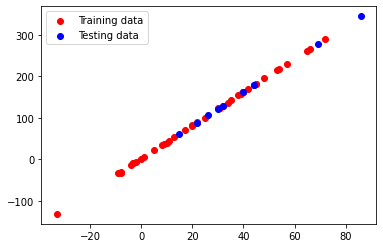

In [ ]:
plot_data()

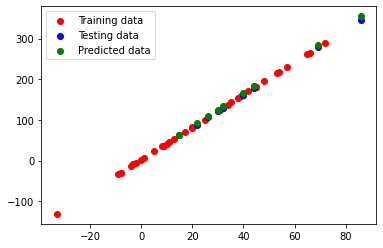

In [ ]:
with torch.inference_mode():
    predictions = model(X_test)
    plot_data(y_pred=predictions)

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([4.1050])), ('bias', tensor([1.7191]))])

# Create a model using inbuilt Linear layers

In [ ]:
class LinearRegressionMod(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                 out_features=1,
                                 bias=True)
    def forward(self, X: torch.Tensor)-> torch.Tensor:
        return self.linear_layer(X)
    

In [ ]:
torch.manual_seed(42)

model_Mod1 = LinearRegressionMod()
model_Mod1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# Device agnostic code for model

device = "cuda" if torch.cuda.is_available() else "cpu"
model_Mod1.to(device)
next(model_Mod1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Device agnostic code for data

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [ ]:
# Loss function and optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_Mod1.parameters(),
                            lr=0.001)

optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.001,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [ ]:
# Training and testing loop

torch.manual_seed(42)
epochs = 300

for epoch in range(epochs):
    # Training 
    model_Mod1.train()

    # Forward pass
    y_preds_train = model_Mod1(X_train)

    # Calculating loss function
    loss_train = loss_fn(y_preds_train, y_train)

    # Clearing gradiets
    model_Mod1.zero_grad()

    # Backward pass
    loss_train.backward()

    # Gradient descent 
    optimizer.step()

    # Evaluating
    if (epoch%25 == 0):
        model_Mod1.eval()
        with torch.inference_mode():
            y_preds_test = model_Mod1(X_test)
        
        print(f"|Epoch:{epoch} |Train loss:{loss_train} |Test loss:{loss_test} |Parameters:{model_Mod1.state_dict()}")

|Epoch:0 |Train loss:89.09160614013672 |Test loss:6.607926845550537 |Parameters:OrderedDict([('linear_layer.weight', tensor([[0.7920]], device='cuda:0')), ('linear_layer.bias', tensor([0.8306], device='cuda:0'))])
|Epoch:25 |Train loss:70.2793197631836 |Test loss:6.607926845550537 |Parameters:OrderedDict([('linear_layer.weight', tensor([[1.4776]], device='cuda:0')), ('linear_layer.bias', tensor([0.8456], device='cuda:0'))])
|Epoch:50 |Train loss:51.46841049194336 |Test loss:6.607926845550537 |Parameters:OrderedDict([('linear_layer.weight', tensor([[2.1632]], device='cuda:0')), ('linear_layer.bias', tensor([0.8594], device='cuda:0'))])
|Epoch:75 |Train loss:32.65754318237305 |Test loss:6.607926845550537 |Parameters:OrderedDict([('linear_layer.weight', tensor([[2.8488]], device='cuda:0')), ('linear_layer.bias', tensor([0.8731], device='cuda:0'))])
|Epoch:100 |Train loss:13.880515098571777 |Test loss:6.607926845550537 |Parameters:OrderedDict([('linear_layer.weight', tensor([[3.5337]], dev

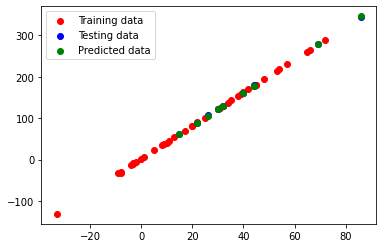

In [ ]:
with torch.inference_mode():
    preds = model_Mod1(X_test)
    plot_data(y_pred=preds.cpu())

In [ ]:
preds

tensor([[129.3728],
        [177.5330],
        [ 61.1458],
        [277.8668],
        [105.2927],
        [177.5330],
        [ 89.2393],
        [161.4796],
        [121.3461],
        [346.0938]], device='cuda:0')

# Saving model and then loading it

In [ ]:
from pathlib import Path

model_path = Path("Saved_Model")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "Model1.pth"
full_model_path = model_path / model_name

In [ ]:
# Saving 
torch.save(obj=model_Mod1.state_dict(),
           f=full_model_path)

In [ ]:
# Loading 
model_Mod2 = LinearRegressionMod()
model_Mod2.load_state_dict(state_dict=torch.load(f=full_model_path))

<All keys matched successfully>

In [ ]:
model_Mod2.to(device)

LinearRegressionMod(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
model_Mod2.eval()
with torch.inference_mode():
    new_preds = model_Mod2(X_test)

(preds == new_preds).all()

tensor(True, device='cuda:0')

In [ ]:
import io
with open(full_model_path, 'rb') as f:
    # buffer = io.BytesIO(f.read())
    buffer = io.BytesIO(f.read())
    print(buffer

AttributeError: ignored